# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

Sumber Dataset:

Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (Kaggle, UCI ML Repository, Open Data) atau data primer yang Anda kumpulkan sendiri. Sumber dataset: https://www.kaggle.com/datasets/prathamtripathi/drug-classification


# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('/content/drug200.csv')
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [4]:
df.isna().sum()


,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

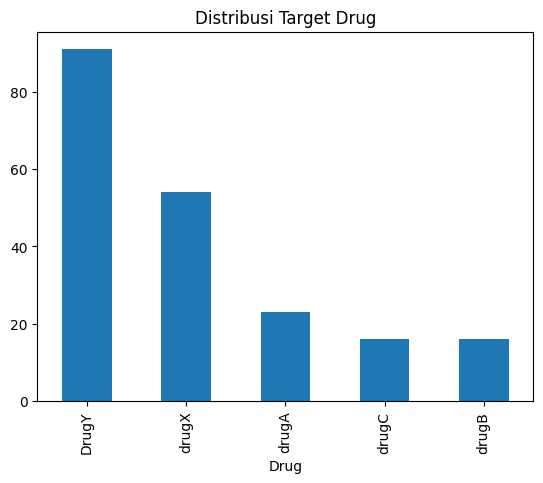

In [5]:
df['Drug'].value_counts()
df['Drug'].value_counts().plot(kind='bar')
plt.title("Distribusi Target Drug")
plt.show()

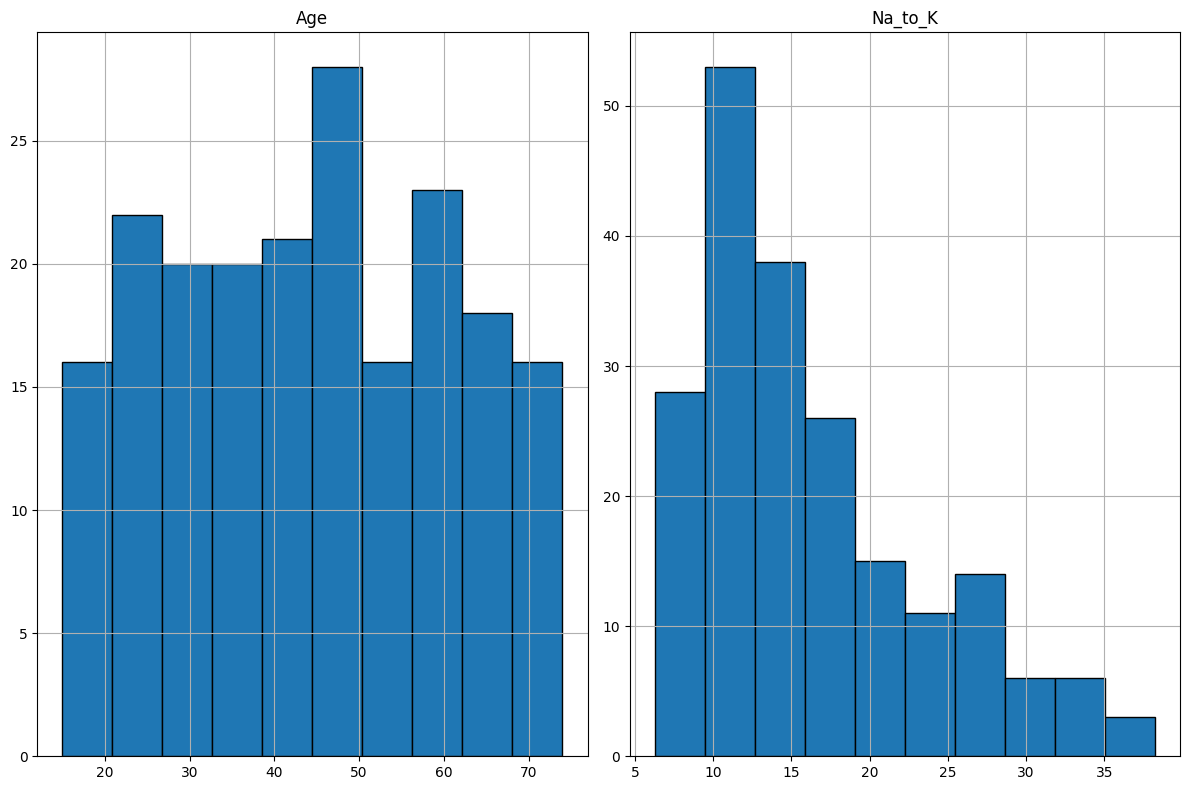

In [6]:
df.hist(figsize=(12,8), edgecolor='black')
plt.tight_layout()
plt.show()

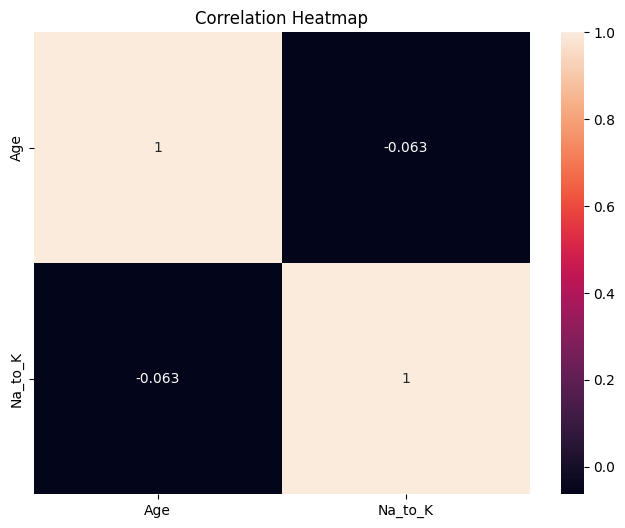

In [7]:
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Copy dataframe untuk preprocessing
df_processed = df.copy()

### 4.1 Encoding Categorical Variables
print("\nEncoding categorical variables...")

# Label Encoding untuk Sex (binary)
le_sex = LabelEncoder()
df_processed['Sex'] = le_sex.fit_transform(df_processed['Sex'])
print(f"Sex encoding: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")

# Label Encoding untuk BP (ordinal: LOW < NORMAL < HIGH)
bp_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df_processed['BP'] = df_processed['BP'].map(bp_mapping)
print(f"BP encoding: {bp_mapping}")

# Label Encoding untuk Cholesterol (ordinal: NORMAL < HIGH)
chol_mapping = {'NORMAL': 0, 'HIGH': 1}
df_processed['Cholesterol'] = df_processed['Cholesterol'].map(chol_mapping)
print(f"Cholesterol encoding: {chol_mapping}")

# Label Encoding untuk target variable
le_drug = LabelEncoder()
df_processed['Drug'] = le_drug.fit_transform(df_processed['Drug'])
print(f"Drug encoding: {dict(zip(le_drug.classes_, le_drug.transform(le_drug.classes_)))}")

print(f"\nProcessed data shape: {df_processed.shape}")
print(f"\nFirst 5 rows after encoding:")
print(df_processed.head())

### 4.2 Split Features dan Target
X = df_processed.drop('Drug', axis=1)
y = df_processed['Drug']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

### 4.3 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=42,
stratify=y
)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTrain target distribution:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"\nTest target distribution:\n{pd.Series(y_test).value_counts().sort_index()}")

### 4.4 Save Preprocessed Data
print("\n" + "="*60)
print("SAVING PREPROCESSED DATA")
print("="*60)

# Simpan dalam format yang siap untuk training
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)

# Simpan juga full processed dataset
df_processed.to_csv('drug200_processed.csv', index=False)

print("✓ Saved: X_train.csv")
print("✓ Saved: X_test.csv")
print("✓ Saved: y_train.csv")
print("✓ Saved: y_test.csv")
print("✓ Saved: drug200_processed.csv")


DATA PREPROCESSING

Encoding categorical variables...
Sex encoding: {'F': np.int64(0), 'M': np.int64(1)}
BP encoding: {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
Cholesterol encoding: {'NORMAL': 0, 'HIGH': 1}
Drug encoding: {'DrugY': np.int64(0), 'drugA': np.int64(1), 'drugB': np.int64(2), 'drugC': np.int64(3), 'drugX': np.int64(4)}

Processed data shape: (200, 6)

First 5 rows after encoding:
   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   2            1   25.355     0
1   47    1   0            1   13.093     3
2   47    1   0            1   10.114     3
3   28    0   1            1    7.798     4
4   61    0   0            1   18.043     0

Features shape: (200, 5)
Target shape: (200,)

Feature columns: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

Train set size: 160 samples
Test set size: 40 samples

Train target distribution:
Drug
0    73
1    18
2    13
3    13
4    43
Name: count, dtype: int64

Test target distribution:
Drug
0    18
1     5
2     3
3     3
4    11
Name: cou